# A/B-тест для увеличения выручки интернет-магазина

Есть подготовленный список гипотез для увеличения выручки интернет-магазина. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.


Имеются данные о гипотезах в файле `hypothesis.csv`:

`Hypothesis` — краткое описание гипотезы;

`Reach` — охват пользователей по 10-балльной шкале;

`Impact` — влияние на пользователей по 10-балльной шкале;

`Confidence` — уверенность в гипотезе по 10-балльной шкале;

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные о заказах в файле `orders.csv`:

`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue` — выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.

Данные о посетителях интернет-магазина  в файле `visitors.csv`:

`date` — дата;

`group` — группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

План исследования:

1. Изучение и предобработка данных;

2. Приоритезация гипотез:

* Применение фреймворка ICE для приоритизации гипотез.

* Применение фреймворка RICE для приоритизации гипотез. 

3. Анализ A/B-теста;

4. Общий вывод.

### Изучение и предобработка данных

In [1]:
#загружаем все необходимые бибилиотеки
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#открываем файлы и записываем их в соответствующие переменные
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),
    pd.read_csv('/datasets/orders.csv'),
    pd.read_csv('/datasets/visitors.csv'),
)

In [3]:
#напишем функцию, с помощью которой выведем основную информацию о файлах
def data_inf(df):
    print(f'Первые строки таблицы:')
    print('*'*20)
    display(df.head())
    print(f'Информация о таблице:')
    print('*'*20)
    df.info()
    print(f'Количество дубликатов:')
    print('*'*20)
    for name, values in df.iteritems():
        print(name, values.duplicated().sum()) 
    print(f'Наиболее часто встречающиеся строки:')
    print('*'*20)
    for name, values in df.iteritems():
        print(name, values.value_counts)

In [4]:
data_inf(hypothesis)
data_inf(orders)
data_inf(visitors)

Первые строки таблицы:
********************


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Информация о таблице:
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
Количество дубликатов:
********************
Hypothesis 0
Reach 3
Impact 2
Confidence 2
Efforts 3
Наиболее часто встречающиеся строки:
********************
Hypothesis <bound method IndexOpsMixin.value_counts of 0    Добавить два новых канала привлечения трафика,...
1    Запустить собственную службу доставки, что сок...
2    Добавить блоки рекомендаций товаров на сайт ин...
3    Изменить структура категорий, что увеличит кон...
4    Изменить цвет фона главной страницы, чтобы уве...
5    Добавить страницу отзывов клиент

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Информация о таблице:
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Количество дубликатов:
********************
transactionId 0
visitorId 166
date 1166
revenue 484
group 1195
Наиболее часто встречающиеся строки:
********************
transactionId <bound method IndexOpsMixin.value_counts of 0       3667963787
1       2804400009
2       2961555356
3       3797467345
4       2282983706
           ...    
1192    2662137336
1193    2203539145
1194    1807773912
1195    1947021204
1196    3936777065
Name: transactionId, Length: 1197, dtype: int64>
visitorId <bound m

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Информация о таблице:
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество дубликатов:
********************
date 31
group 60
visitors 4
Наиболее часто встречающиеся строки:
********************
date <bound method IndexOpsMixin.value_counts of 0     2019-08-01
1     2019-08-02
2     2019-08-03
3     2019-08-04
4     2019-08-05
         ...    
57    2019-08-27
58    2019-08-28
59    2019-08-29
60    2019-08-30
61    2019-08-31
Name: date, Length: 62, dtype: object>
group <bound method IndexOpsMixin.value_counts of 0     A
1     A
2     A
3     A
4     A
     ..
57    B
58    B
59    B
60    B
61    B
Name: group, Length: 62, dtype: object>
visitors <bound method IndexOpsM

Названия столбцов таблицы `hypothesis` необходимо привести к нижнему регистру. Пропусков нет, тип данных обозначен верно.

Названия столбцов таблицы `orders` обозначены верно. Пропусков нет, тип данных столбца `date` надо изменить на datetime.

Названия столбцов таблицы `visitors` обозначены верно. Пропусков нет, тип данных столбца `date` также надо изменить на datetime.

In [5]:
#приведем к нижнему регистру столбцы таблицы hypothesis
hypothesis.columns = [x.lower() for x in hypothesis.columns]
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [6]:
#поменяем тип данных столбцов date в таблицах orders и visitors
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [7]:
#проверим, есть ли пользователи в датафрейме orders, которые попали в обе группы
np.intersect1d(orders.query('group=="A"')['visitorId'].unique(), orders.query('group=="B"')['visitorId'].unique())

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

Такие пользователи действительно есть, но не будем пока их удалять.

In [8]:
#выведем информацию о датафреймах еще раз, чтобы проверить удалось ли
#привести названия столбцов к нужному виду и заменить тип данных там, где это было нужно
hypothesis.info()
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFr

С данными все в порядке, теперь можно переходить к обработке.

### Приоритизация гипотез

В таблице `hypothesis` содержится 9 гипотез. Для их приоритизации применим к этому датафрейму фреймворк ICE.

In [9]:
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
pd.set_option('max_colwidth', 200)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По ICE наиболее перспективные гипотезы: 8, 0 и 7.

Теперь для приоритизации применим к этому датафрейму фреймворк RICE, и посмотрим как изменилась приоритизация гипотез при применении RICE вместо ICE. 

In [10]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По RICE наиболее перспективные гипотезы: 7, 2, 0 и 6. Таким образом, гипотезы 7 и 0 так и остались наиболее перспективными, а вместо гипотезы 8 в лидеры вышли гипотезы 2 и 6. Так вышло потому, что, согласно гипотезам 2 и 6, изменения, которые мы хотим внести затронут больше пользователей (параметр Reach у этих гипотез выше).

Стоит отметить, что формула RICE и ICE отличаются тем, что в RICE учитывается параметр Reach, который отражает количество пользователей, которых затронет изменение, что мы хотим внести. На основе анализа, можно предположить, что самой первой стоит протестировать гипотезу 7, т.к. она лидирует по результатам применения обоих фреймворков, и после учета в формуле RICE параметра Reach, она заняла первое место по приоритету, т.е. в ходе ее тестирования будет задействовано больше всего пользователей.

### Анализ A/B-теста

Теперь нам понадобятся датафреймы `orders` и `visitors`.

Проанализируем A/B-тест:

#### График кумулятивной выручки по группам

In [11]:
#создим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders
#и избавимся от дубликатов методом drop_duplicates()
datesGroups = orders[['date', 'group']].drop_duplicates()

#объявим переменную oAggregated, содержащую: дату, группу A/B-теста, число уникальных заказов в группе теста 
#по указанную дату включительно, число уникальных пользователей, совершивших хотя бы 1 заказ в группе 
#теста по указанную дату включительно; суммарную выручку заказов в группе теста по указанную дату включительно
oAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date']<=x['date'], orders['group']==x['group'])]\
                                     .agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}),\
                                     axis=1).sort_values(by=['date', 'group'])

#объявим переменную vAggregated, содержащую: дату, группу A/B-теста, количество уникальных посетителей в группе 
#теста по указанную дату включительно
vAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date']<=x['date'], visitors['group']==x['group'])]\
                                       .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)\
                                       .sort_values(by=['date', 'group'])

#объединим oAggregated и vAggregated по колонкам 'date', 'group' методом merge()
cmlData = oAggregated.merge(vAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cmlData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cmlData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


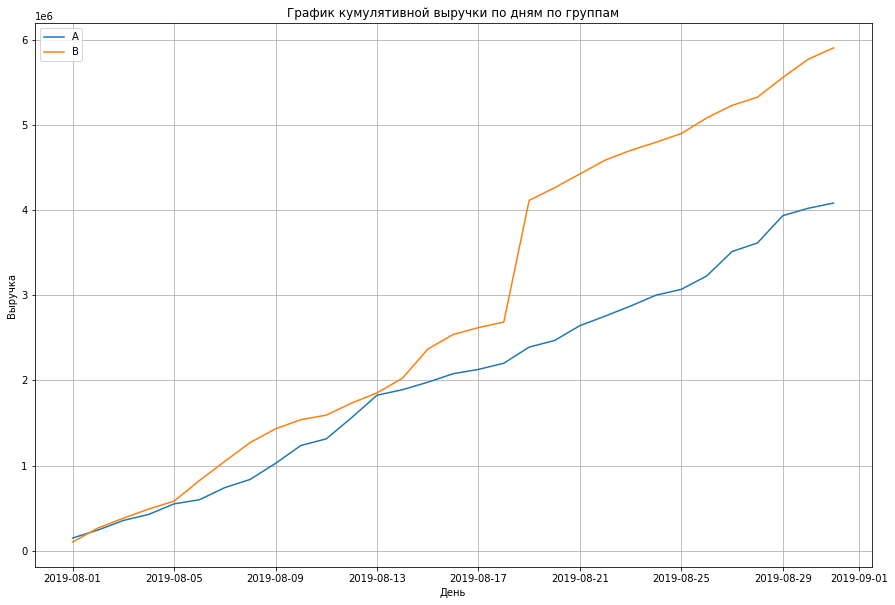

In [12]:
#создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cmlRevenueA = cmlData[cmlData['group']=='A'][['date', 'revenue', 'orders']]


#создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cmlRevenueB = cmlData[cmlData['group']=='B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(15, 10))
#строим график выручки группы А
plt.plot(cmlRevenueA['date'], cmlRevenueA['revenue'], label='A')

#строим график выручки группы B
plt.plot(cmlRevenueB['date'], cmlRevenueB['revenue'], label='B')


plt.title('График кумулятивной выручки по дням по группам')
plt.xlabel('День')
plt.ylabel('Выручка')
plt.grid()
plt.legend()
plt.show()


Поначалу выручка распределялась равномерно между сегментами, и чуть ближе к середине месяца сегмент B начинал лидировать, и продолжил лидировать до конца теста. Возможно это связано с тем, что в данных присутсвуют очень дорогие заказы или есть отдельные пользователи, которые совершили очень много заказов.

#### График кумулятивного среднего чека по группам

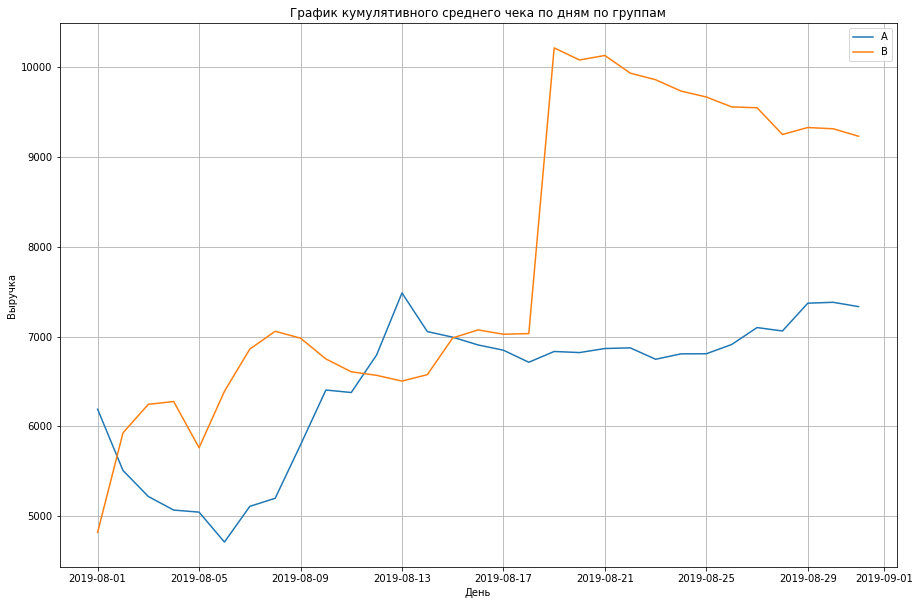

In [13]:
plt.figure(figsize=(15, 10))
plt.plot(cmlRevenueA['date'], cmlRevenueA['revenue']/cmlRevenueA['orders'], label='A')
plt.plot(cmlRevenueB['date'], cmlRevenueB['revenue']/cmlRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по дням по группам')
plt.xlabel('День')
plt.ylabel('Выручка')
plt.grid()
plt.legend()
plt.show()

Кумулятивное значение среднего чека по сегментам сильно колеблется. 18-19-го августа средний чек сегмента группы B сильно вырос, но все равно пошел на постепенный спад. Кумулятивное значение среднего чека каждой группы стабилизируется к концу теста. Необходимо проверить данные на выбросы, которые могут искажать результаты. Если их не будет обнаружено, значит пока еще рано принимать решение по этой метрике.

#### График относительного изменения кумулятивного среднего чека группы B к группе A 

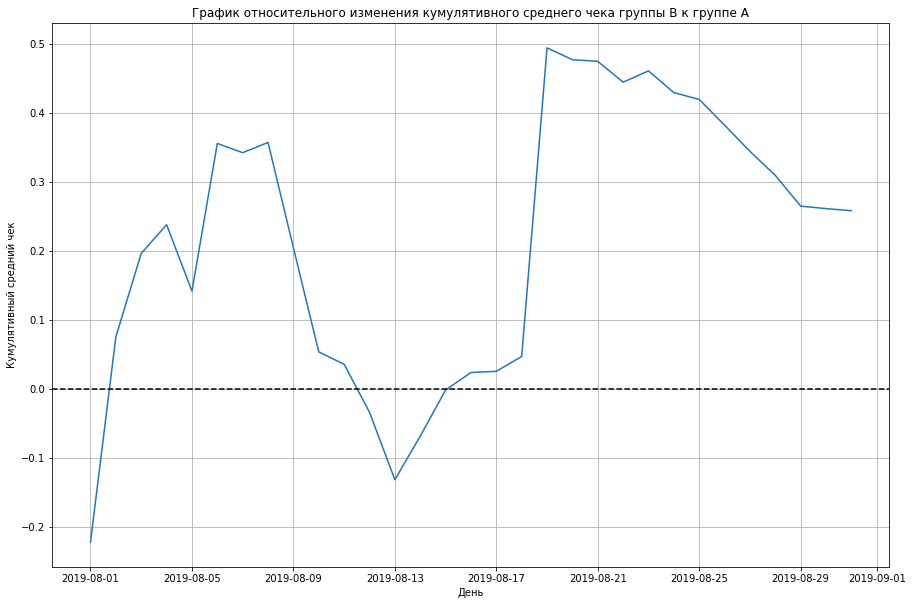

In [14]:
#собираем данные в одном датафрейме
mergedCmlRev = cmlRevenueA.merge(cmlRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#cтроим отношение средних чеков
plt.figure(figsize=(15, 10))
plt.plot(mergedCmlRev['date'], (mergedCmlRev['revenueB']/mergedCmlRev['ordersB'])/(mergedCmlRev['revenueA']/mergedCmlRev['ordersA'])-1)

#добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('День')
plt.ylabel('Кумулятивный средний чек')
plt.grid()
plt.show()

Похоже аномальные заказы все-таки есть, т.к. наблюдаются значительные и резкие изменения результатов теста в некоторые даты.

#### График кумулятивного среднего количества заказов на посетителя по группам 

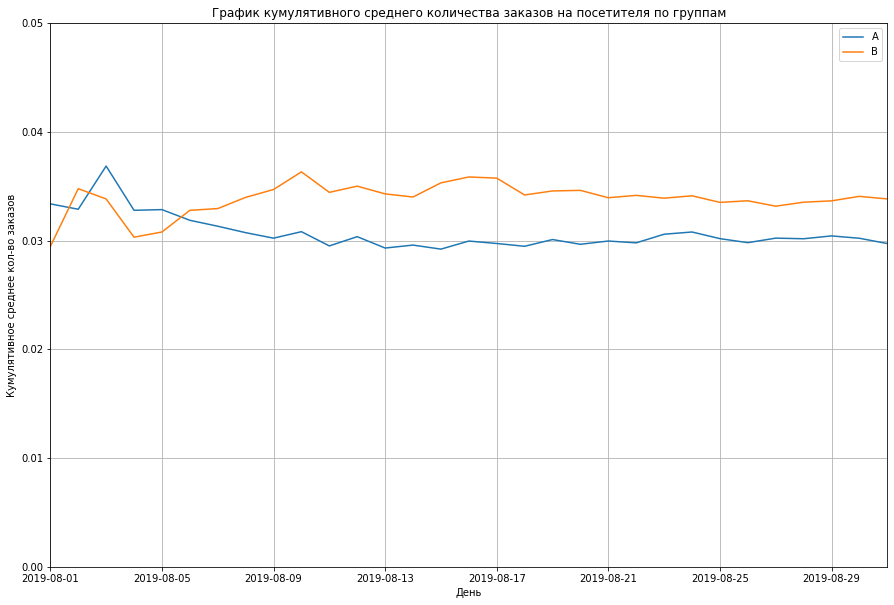

In [15]:
#считаем среднее количество заказов на посетителя
cmlData['conversion'] = cmlData['orders']/cmlData['visitors']

#отделяем данные по группе A и B
cmlDataA = cmlData[cmlData['group']=='A']
cmlDataB = cmlData[cmlData['group']=='B']

#строим графики
plt.figure(figsize=(15, 10))
plt.plot(cmlDataA['date'], cmlDataA['conversion'], label='A')
plt.plot(cmlDataB['date'], cmlDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('День')
plt.ylabel('Кумулятивное среднее кол-во заказов')
plt.grid()
plt.legend()

#задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.show()

У обеих групп можно наблюдать колебания среднего количества заказов на посетителя в самом начале теста, затем у группы В оно возросло и зафиксировалось, у группы А, наоборот, просело и затем тоже зафиксировалось.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

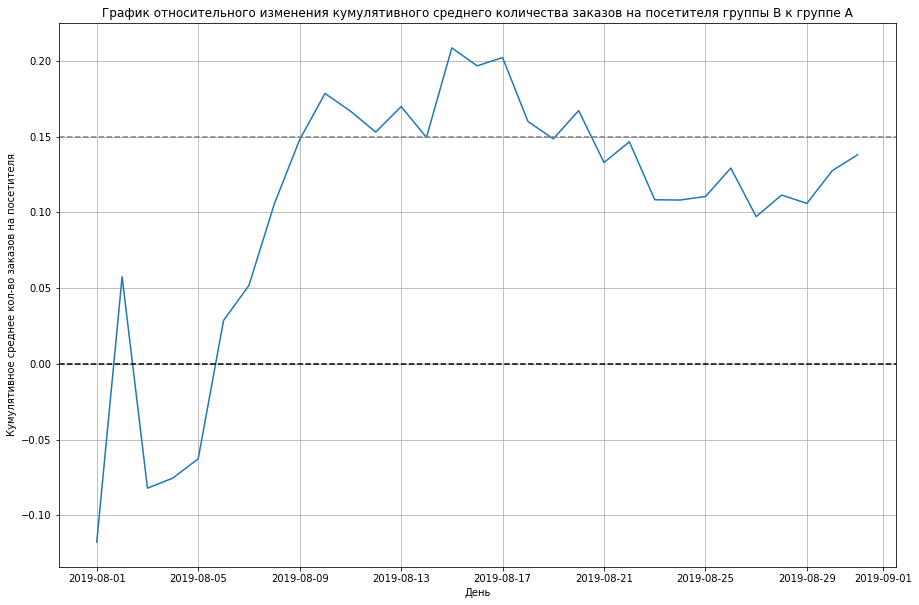

In [16]:
mergedCmlConversions = cmlDataA[['date', 'conversion']].merge(cmlDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A','B'])

plt.figure(figsize=(15, 10))
plt.plot(mergedCmlConversions['date'], mergedCmlConversions['conversionB']/mergedCmlConversions['conversionA']-1, label='Относительный прирост конверсии группы B относительно группы A')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А')
plt.xlabel('День')
plt.ylabel('Кумулятивное среднее кол-во заказов на посетителя')
plt.grid()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

В самом начале группа В резко вырвалась вперед по количеству заказов на посетителя, затем также резко просела, но все равно в дальнейшем она стала лидером. Преимущество группы В составляет около 15%.

#### Точечный график количества заказов по пользователям

In [17]:
#считаем сколько заказов совершил каждый пользователь
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})

ordersByUsers.sort_values(by='transactionId',ascending=False).head(10)

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


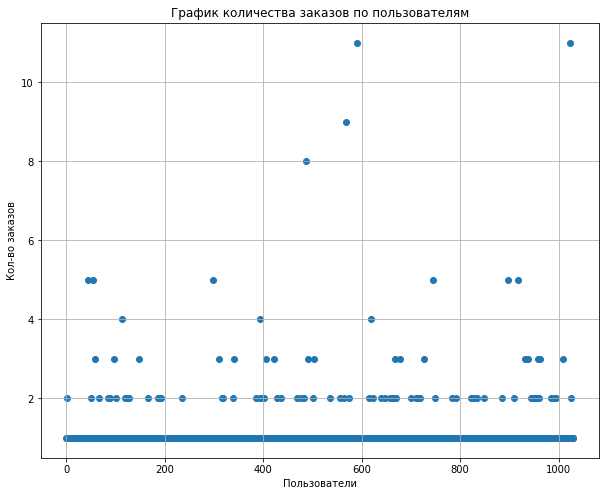

In [18]:
#построим график
#серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10, 8))
plt.scatter(x_values, ordersByUsers['transactionId'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Кол-во заказов')
plt.grid()

Зачастую пользователи совершают 1-2 покупки. Тех же, кто совершает больше 2 покупок намного меньше. Есть также сильно выбивающиеся пользователи, которые сделали 8-11 заказов. Они скорее всего и являются аномальными.

#### Расчет 95-го и 99-го перцентиля количества заказов на пользователя

In [19]:
np.percentile(ordersByUsers['transactionId'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершили более 2 заказов, и не более 1% пользователей - более 4 заказов. Можно считать, что пользователи, совершившие более 4 заказов являются аномальными.

#### Точечный график стоимостей заказов

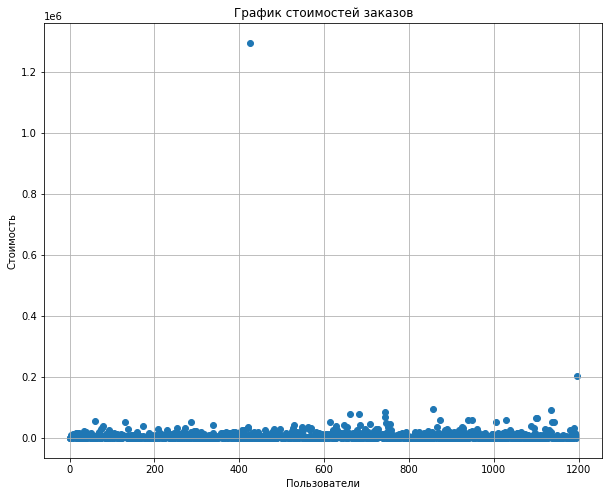

In [20]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10, 8))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость')
plt.grid()

Есть выбивающиеся заказы, стоящие 1,3 млн. и 200 тысяч. Необходимо проверить, действительно ли их можно назвать аномальными.

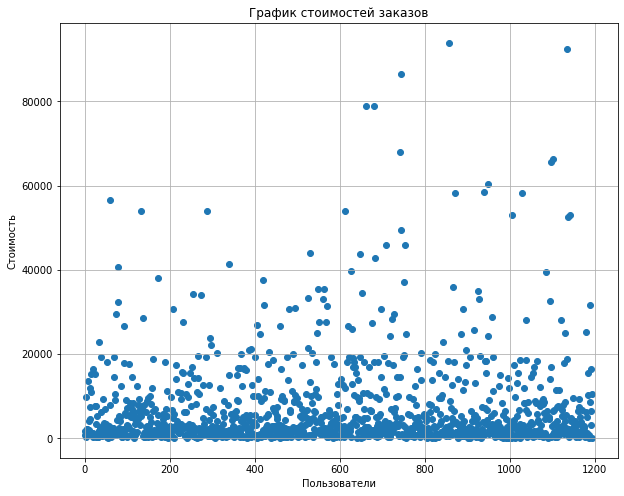

In [21]:
#построим график, установив ограничение по стоимости заказов, чтобы исключить влияние аномалий
orders_filtered = orders.query('revenue < 100000')

x_values = pd.Series(range(0, len(orders_filtered['revenue'])))
plt.figure(figsize=(10, 8))
plt.scatter(x_values, orders_filtered['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость')
plt.grid()

Устранив аномалии можно увидеть более четкую картину распределения заказов по стоимости. Большинство заказов лежат в пределах 20 тысяч. Хотя встречаются заказы и дороже этой суммы.

#### Расчет 95-го и 99-го перцентиля стоимости заказов 

In [22]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% пользователей совершили заказ более, чем на 28 тысяч, и не более 1 % пользователей - больше, чем на 58 тысяч.

#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

H0: Статистически значимых различий в среднем количестве заказов на посетителя между группами по "сырым данным" нет.

H1: Статистически значимые различия в среднем количестве заказов на посетителя между группами по "сырым данным" есть.

Для проверки гипотез будем использовать критерий Манна-Уитни, т.к. у нас есть 2 независимые выборки и в данных есть выбросы, сильно сдвигающие параметрические результаты. В качестве alpha возьмем значение 0.05.

In [23]:
#отделяем посетителей группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACml = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACml.columns = ['date', 'visitorsCmlA']

#отделяем посетителей группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCml = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCml.columns = ['date', 'visitorsCummulativeB']

#считаем кол-во пользователей в день по группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACml = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACml.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#считаем кол-во пользователей в день по группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCml = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCml.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


In [24]:
#объединяем все получившиеся датафреймы в 1
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACml, left_on='date', right_on='date', how='left')
    .merge(ordersBCml, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACml, left_on='date', right_on='date', how='left')
    .merge(visitorsBCml, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [25]:
#создадим переменные ordersByUsersA и ordersByUsersВ, где для пользователей, совершивших хотя бы 1 заказ, будет указано 
#число заказов
ordersByUsersA = (orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'transactionId']


#объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя
sampleA = pd.concat([ordersByUsersA['transactionId'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()\
                    - len(ordersByUsersA['transactionId'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['transactionId'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()\
                    - len(ordersByUsersB['transactionId'])), name='orders')], axis=0)

#посчитаем статистическую значимость различия среднего количества заказов по результатам теста, применив тест Манна-Уитни.
#Выведем p-value для сравнения среднего между группами, округлив p-value до 3 знаков после запятой, 
#вычислим и выведем относительное различие в среднем между группами, округлив до 3 знаков после запятой

print("p-value составляет: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительное различие в среднем между группами: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value составляет: 0.017
Относительное различие в среднем между группами: 0.138


p-value меньше 0.05, нулевую гипотезу можно отвергнуть. Соответственно, на основе анализа "сырых данных", обнаружено, что в среднем кол-ве заказов есть статистически значимые различия между двумя группами. Относительный прирост среднего группы В к конверсии группы А составляет 13.8%.

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным 

Н0: Средний чек заказа группы А = средний чек заказа группы В

Н1: Средний чек заказа группы А ≠ средний чек заказа группы В

In [26]:
print('p-value составляет: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем между группами: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1))

p-value составляет: 0.729
Относительное различие в среднем между группами: 0.259


p-value больше 0.05, значит нулевую гипотезу отвергнуть нельзя, статистически значимых отличий в среднем чеке между группами нет. Относительное различие составило 25.9%. Необходимо проанализировать аномалии.

#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным 

Для начала подготовим, очищенные от аномалий, данные. На основе предыдущих вычислений, предположим, что пользователи, что совершили 4 и более заказов или совершили заказ дороже 30 тысяч, являются аномальными.

Н0: Среднее количество заказов на посетителя группы А = среднее количество заказов на посетителя группы В

Н1: Среднее количество заказов на посетителя группы А ≠ среднее количество заказов на посетителя группы В

In [27]:
#сделаем срезы с аномальными пользователями
usersWithManyOrders  = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > np.percentile(ordersByUsers['transactionId'], 99)]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > np.percentile(ordersByUsers['transactionId'], 99)]['visitorId'],
    ],
    axis=0,
)
                                  
usersWithExpensiveOrders  = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']

#объединим аномальных пользователей в abnormalUsers
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())
print(abnormalUsers.head(5))

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64


In [28]:
#cоздадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['transactionId'],\
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])),\
                             name='orders')], axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['transactionId'],\
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])),\
                             name='orders')], axis=0)

#выведем p-value для сравнения среднего между очищенными группами и относительный прирост среднего очищенной группы B
print('p-value составляет: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в среднем между группами: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean() - 1))


p-value составляет: 0.014
Относительное различие в среднем между группами: 0.153


p-value меньше 0.05, нулевую гипотезу можно отвергнуть. Относительное различие в среднем между группами составило 18.3%. После очистки данных от аномалий обнаружено больше различий между двумя группами(показатель увеличился на 5%).

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным 

Н0: Средний чек заказа группы А = средний чек заказа группы В

Н1: Средний чек заказа группы А ≠ средний чек заказа группы В

In [29]:
print(
    'p-value составляет: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное различие в среднем между группами: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value составляет: 0.851
Относительное различие в среднем между группами: -0.006


p-value больше 0.05, значит нет оснований отвергать нулевую гипотезу. Значение относительного различия так же, как и p-value, уменьшились после устранения аномалий. Различий в среднем чеке заказа между группами нет.

### Общий вывод

В рамках данного исследования был приоритизирован список гипотез, составленный с целью увеличения выручки крупного интернет-магазина. Далее был запущен A/B-тест, результаты которого были проанализированы.

**Этап 1. Изучение и предварительная обработка данных**

На этапе предобработки были произведены:

* приведение названий столбцов к нужному виду;

* изменение типа данных там, где это было необходимо;

* проверка данных на пропуски и дубликаты.

Столбцы датафрейма `hypothesis` приведены к нижнему регистру. Тип данных в столбце date датафреймов `orders` и `visitors` был изменен. Пропусков и дубликатов в данных обнаружено не было.

**Этап 2. Приоритизация гипотез**

Приоритизация гипотез была произведена при помощи фреймворков ICE, RICE.

По ICE наиболее перспективные гипотезы: 8, 0 и 7. По RICE наиболее перспективные гипотезы: 7, 2, 0 и 6. Таким образом, гипотезы 7 и 0 так и остались наиболее перспективными, а вместо гипотезы 8 в лидеры вышли гипотезы 2 и 6. 

**Этап 3. Анализ A/B теста**

* Есть статистически значимые различия между двумя группами в *среднем кол-ве заказов* как по "сырым данным", так и после фильтрации.


* Нет статистически значимых различий в *среднем чеке заказа* между группами как по "сырым данным", так и после фильтрации.


* График различия конверсии между группами сообщает, что у обеих групп можно наблюдать колебания *среднего количества заказов на посетителя* в самом начале теста, затем у группы В оно возросло и зафиксировалось, у группы А оно, наоборот, просело и затем тоже зафиксировалось.


* График различия *среднего чека* колеблется. В ходе дальнейшего анализа были обнаружены аномалии. Сделать из этого графика определённые выводы нельзя.

Таким образом, можно сделать вывод о том, что на данный момент можно остановить тест, т.к. группа В статистически значимо лучше группы А.